# Vintage Cars MPG Prediction using Machine Learning

The highly competitive automotive industry is constantly optimizing their process to increase fuel efficiency due to the increase of fuel prices. This has not always been the case; Fuel economy has not been a major competitive issue in the marketplace since 1981. Relatively low gasoline prices have allowed consumers to focus instead on vehicle prices, performance, comfort, and style.

So, what was the fuel efficiency of the cars before the price increase? The purpose of the project  is to predict the MPG (Mile Per Gallon) for a vehicle and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s base on other attributes of that vehicle.

This notebook uses a public dataset from Kaggle (https://www.kaggle.com/uciml/autompg-dataset?select=auto-mpg.csv). 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype

## Data Gathering and Preprocessing

In [2]:
# Read cvs file using pandas
mpg_df = pd.read_csv('Data/data.csv')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make,model,country
0,9.0,8,304.0,193.0,4732,18.5,70,1,international (IHC),1200d,United States
1,10.0,8,307.0,200.0,4376,15.0,70,1,chevrolet,c20,United States
2,10.0,8,360.0,215.0,4615,14.0,70,1,ford,f250,United States
3,11.0,8,380.0,189.0,4648,11.0,70,2,rolls royce,silver shadow,England
4,11.0,8,380.0,189.0,4648,11.0,71,2,rolls royce,silver shadow,England
...,...,...,...,...,...,...,...,...,...,...,...
404,43.4,4,90.0,48.0,2335,23.7,80,2,volkswagen,dasher (diesel),Germany
405,44.0,4,97.0,52.0,2130,24.6,82,2,volkswagen,pickup,Germany
406,44.3,4,90.0,48.0,2085,21.7,80,2,volkswagen,rabbit c (diesel),Germany
407,44.6,4,91.0,67.0,1850,13.8,80,3,honda,civic 1500 gl,Japan


In [3]:
# Get info about the data
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           409 non-null    float64
 1   cylinders     409 non-null    int64  
 2   displacement  409 non-null    float64
 3   horsepower    403 non-null    float64
 4   weight        409 non-null    int64  
 5   acceleration  409 non-null    float64
 6   model year    409 non-null    int64  
 7   origin        409 non-null    int64  
 8   make          409 non-null    object 
 9   model         409 non-null    object 
 10  country       409 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 35.3+ KB


In [4]:
# Checking for all the null values
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
make            0
model           0
country         0
dtype: int64

The horsepower column has 6 missing values

In [5]:
# Impute nulls with median
mpg_df.horsepower.fillna(mpg_df.horsepower.median(), inplace=True)
mpg_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           409 non-null    float64
 1   cylinders     409 non-null    int64  
 2   displacement  409 non-null    float64
 3   horsepower    409 non-null    float64
 4   weight        409 non-null    int64  
 5   acceleration  409 non-null    float64
 6   model year    409 non-null    int64  
 7   origin        409 non-null    int64  
 8   make          409 non-null    object 
 9   model         409 non-null    object 
 10  country       409 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 35.3+ KB


In [6]:
mpg_df.to_csv('Data/clean_data.csv', index=False)

# Data Exploration

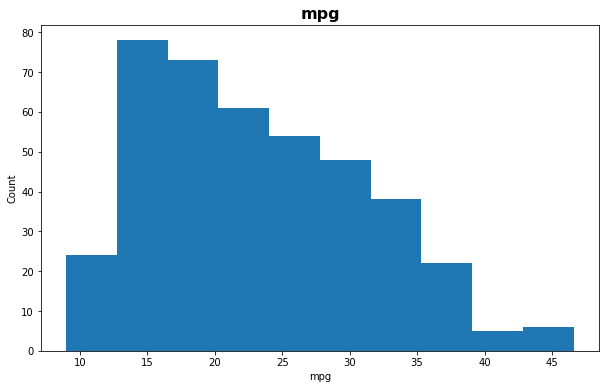

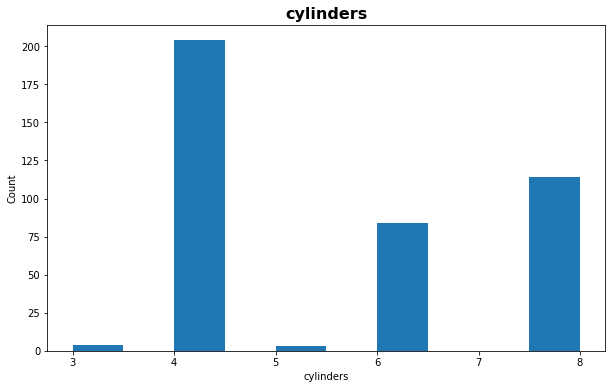

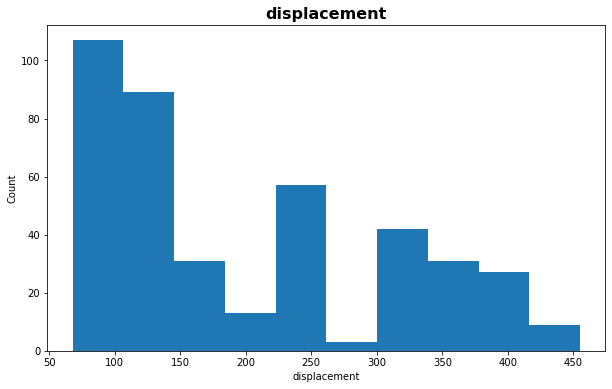

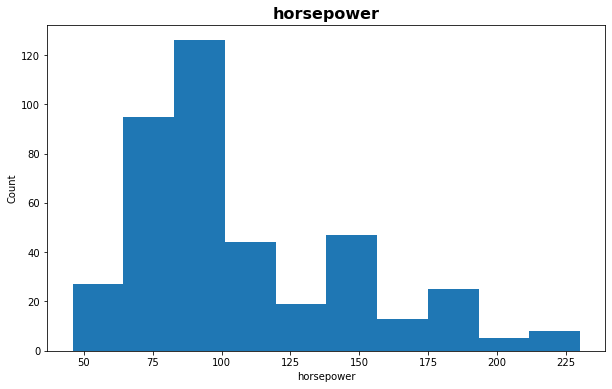

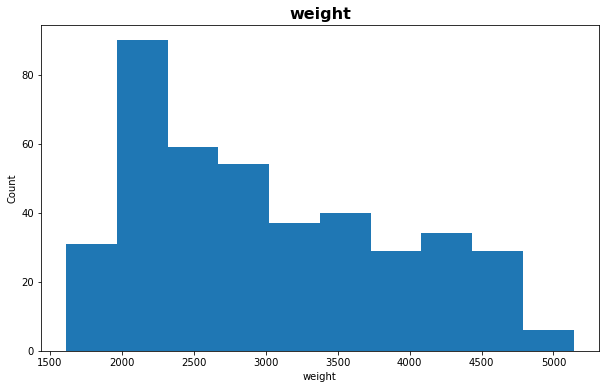

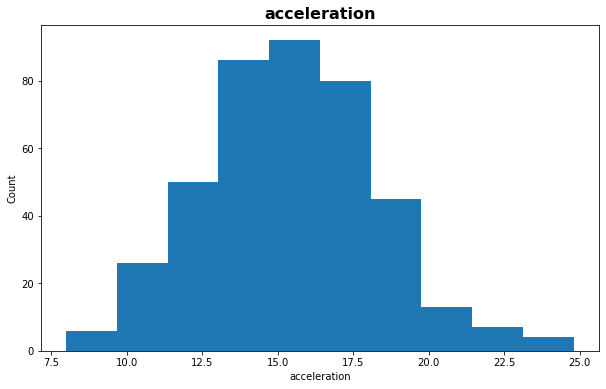

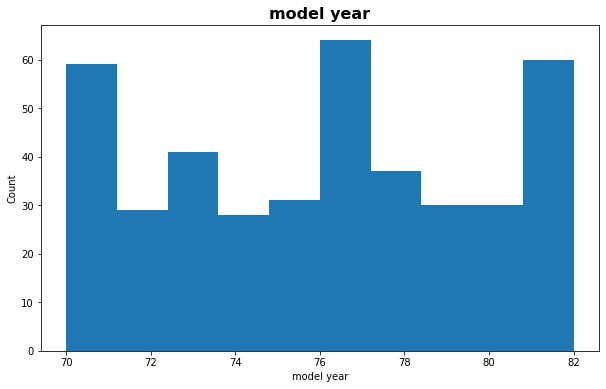

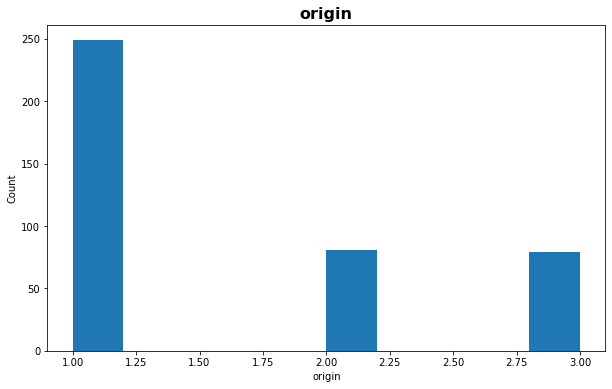

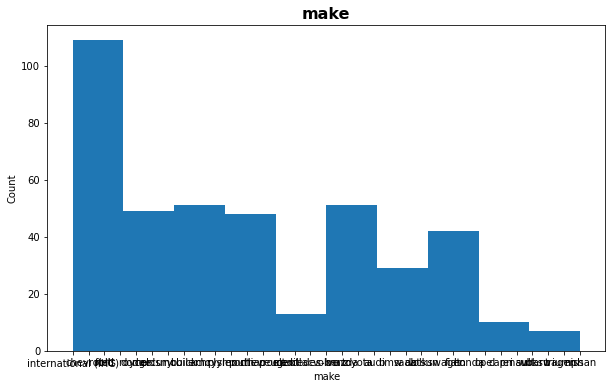

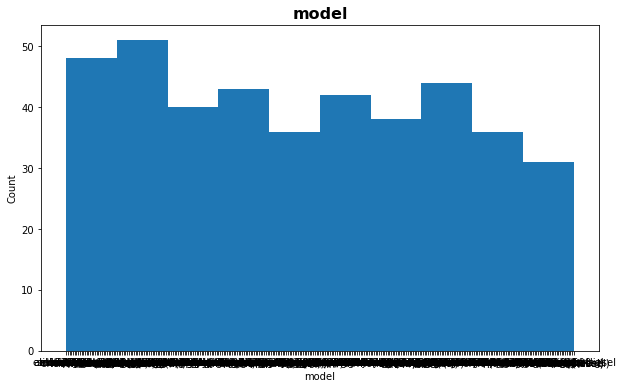

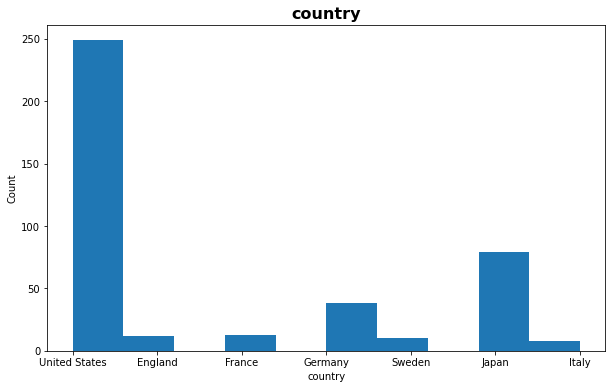

In [7]:
 # Plot distributions
for col in mpg_df.columns:
    
    plt.figure(figsize=(10,6))
    plt.hist(mpg_df[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

## Correlations

In [8]:
mpg_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.788159,-0.816540,-0.787206,-0.841886,0.456455,0.567691,0.524289
cylinders,-0.788159,1.000000,0.953080,0.849093,0.901268,-0.536239,-0.345548,-0.523433
displacement,-0.816540,0.953080,1.000000,0.903833,0.938297,-0.577335,-0.363767,-0.557914
horsepower,-0.787206,0.849093,0.903833,1.000000,0.876306,-0.712086,-0.399472,-0.393686
weight,-0.841886,0.901268,0.938297,0.876306,1.000000,-0.464254,-0.302058,-0.523480
acceleration,0.456455,-0.536239,-0.577335,-0.712086,-0.464254,1.000000,0.286633,0.175036
model year,0.567691,-0.345548,-0.363767,-0.399472,-0.302058,0.286633,1.000000,0.174139
origin,0.524289,-0.523433,-0.557914,-0.393686,-0.523480,0.175036,0.174139,1.000000


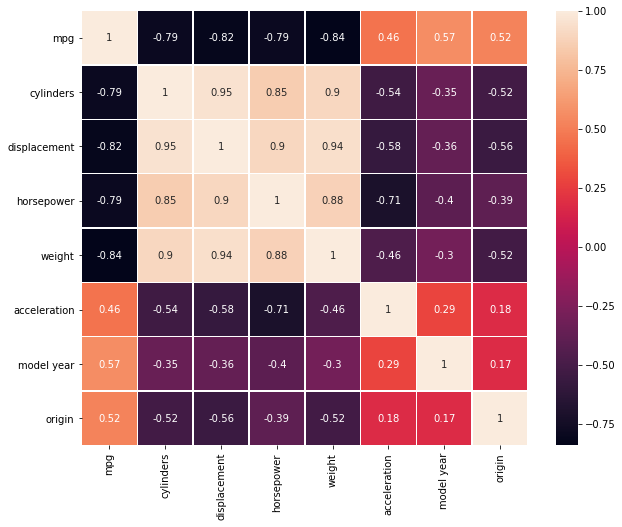

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(mpg_df.corr(), annot=True, linewidths=.5)
plt.show()

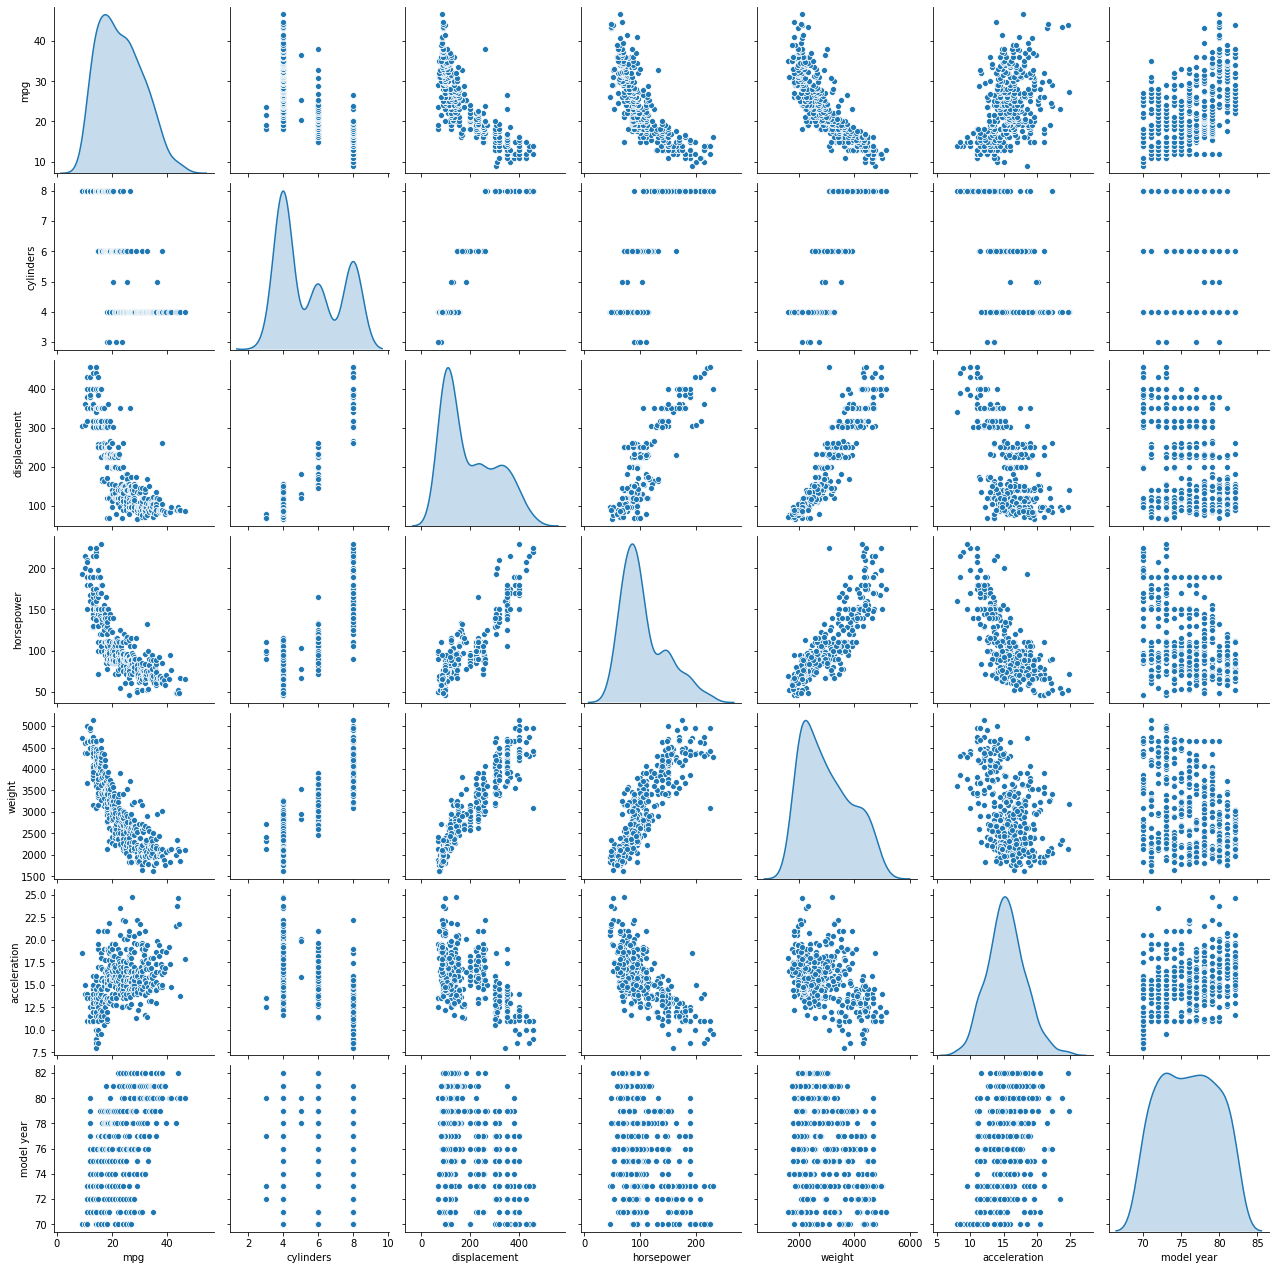

In [10]:
##pairplots to get an intuition of potential correlations

sns.pairplot(mpg_df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]], diag_kind="kde")

## Machine Learning Analysis

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split